# Indian Liver Patient 

# Introduction to Indian Liver Patient Dataset (ILPD)
The Indian Liver Patient Dataset (ILPD) is a medical dataset that contains records of patients from the Andhra Pradesh region of India. The dataset was collected to aid in the early detection and diagnosis of liver diseases, which are a major health concern in India. Liver diseases are often silent and progressive, making timely diagnosis critical.

This dataset helps researchers and data scientists develop machine learning models to predict whether a patient is likely to have a liver disease based on a set of blood test results and demographic information.



# Problem:
To build a machine learning model that can accurately predict whether a patient has a liver disease or not based on specific medical test results and demographic details. This model can help medical professionals detect liver disease at an early stage, reducing risks and improving patient outcomes.

# Goal:
To develop a classification model using K-Nearest Neighbors (KNN) on the Indian Liver Patient Dataset (ILPD) to accurately identify liver disease patients.

# Why KNN is suitable:
* Simple and easy to implement.
* Works well with smaller datasets (like ILPD).
* Captures similarity-based patterns.
* Good for medical data where “similar patients” can give insights.

# Importing the Libraries

In [559]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

# Data Loading

In [561]:
a=pd.read_csv('indian_liver_patient.csv')
a

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Data Understanding

In [563]:
a.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [564]:
a.tail(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2


In [565]:
a.shape

(583, 11)

In [566]:
a.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# Data Inspection

In [568]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#  ILPD Structure and Initial Observations
*  Total Records: 583
*  Total Columns: 11
* Missing Values: Albumin_and_Globulin_Ratio: 4 missing values
* Categorical Column: Gender (needs encoding)
* Numerical Columns: 9 numeric features (int/float)
* Target Variable: Dataset (1 = Liver Disease, 2 = Healthy)
* Scaling Required: KNN needs all features to be on the same scale
* Small Dataset: Memory usage: 50.2 KB (good for KNN)
* Likely Imbalanced Classes (needs checking)

In [570]:
a.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# ILPD Statistical Summary :
* Age: 4 – 90 years, avg 45.
* Total_Bilirubin: High max 75, possible outliers.
* Liver Enzymes: Extreme max values (4929, 2000, 2110) → strong outliers.
* Proteins & Albumin: Normal range, some low cases.
* Albumin_and_Globulin_Ratio: Missing 4 values, avg 0.95.
* Target: More cases of liver disease (1) than healthy (2).
* Scaling needed due to varying feature ranges.


# Key Insights:
* Age group mostly middle-aged (avg 45 years).
* Outliers detected in enzyme levels and bilirubin.
* High data skewness in medical features.
* Missing values in Albumin_and_Globulin_Ratio (4 missing).
* Feature scaling is mandatory (important for KNN).
* Likely class imbalance (more liver disease cases).


# Data Preprocessing 

In [574]:
 # Check total number of duplicate rows
duplicate_rows = a[a.duplicated()]
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")

# To display the duplicated rows
duplicate_rows

Total duplicate rows: 13


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


# For health data, it's common that:
* Different people may share the same values.
* So, only exact duplicates should be dropped to avoid losing valuable data.


In [576]:
def duplicate_report(df):
    total_rows = df.shape[0]
    duplicate_rows = df.duplicated().sum()
    print(f"🔹 Total Rows: {total_rows}")
    print(f"🔹 Duplicate Rows: {duplicate_rows}")
    print(f"🔹 Unique Rows: {total_rows - duplicate_rows}")
    print(f"🔹 Duplicate Percentage: {round((duplicate_rows/total_rows)*100, 2)}%")

duplicate_report(a)


🔹 Total Rows: 583
🔹 Duplicate Rows: 13
🔹 Unique Rows: 570
🔹 Duplicate Percentage: 2.23%


In [577]:
a=a.drop_duplicates()

In [578]:
missing_value= a.isna().sum()
missing_value

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [579]:
# Check outlier for Albumin_and_Globulin_Ratio and then will decide whether we have to use mean or median approach

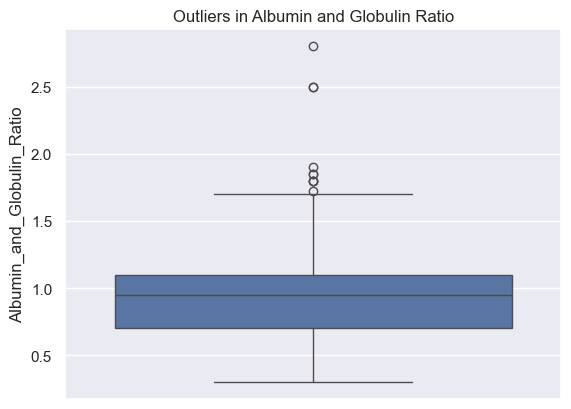

In [580]:
# Boxplot to check outliers in Albumin_and_Globulin_Ratio
sns.boxplot(y=a['Albumin_and_Globulin_Ratio'], data=a)
plt.title('Outliers in Albumin and Globulin Ratio')
plt.show()

In [581]:
a['Albumin_and_Globulin_Ratio'] = a['Albumin_and_Globulin_Ratio'].fillna(a['Albumin_and_Globulin_Ratio'].median())

In [582]:
a.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

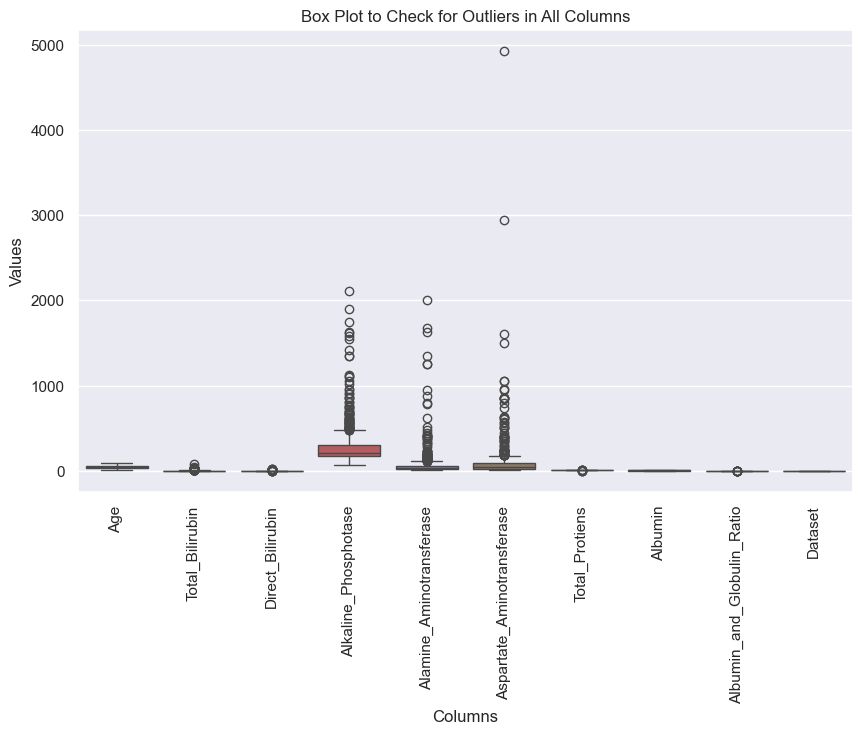

In [583]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=a)
plt.title('Box Plot to Check for Outliers in All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

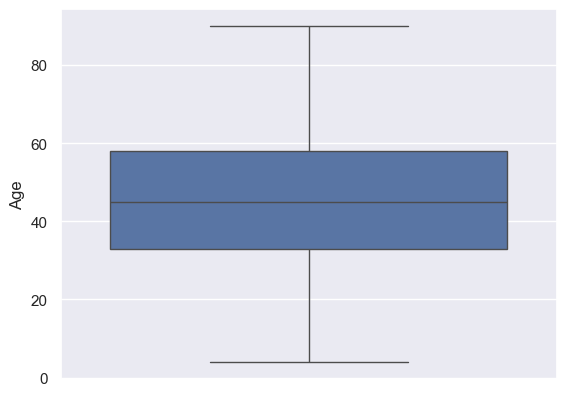

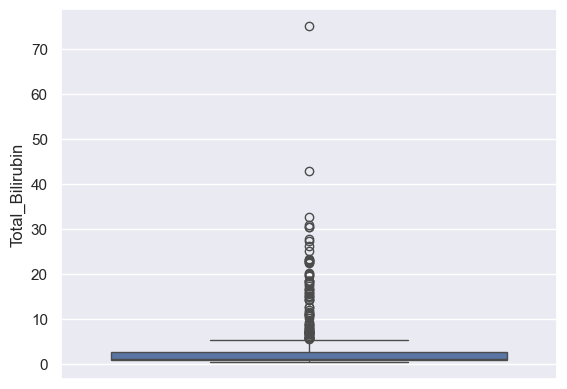

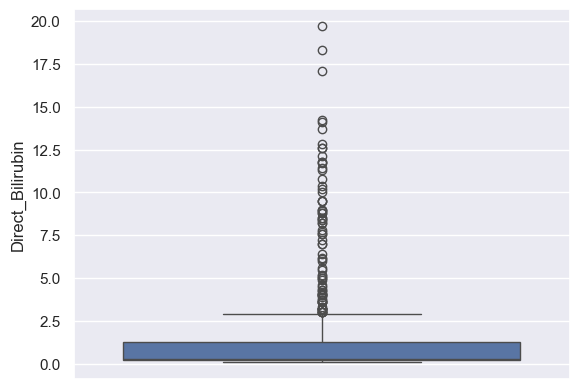

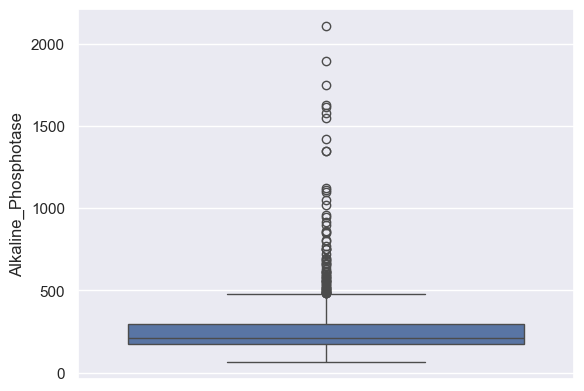

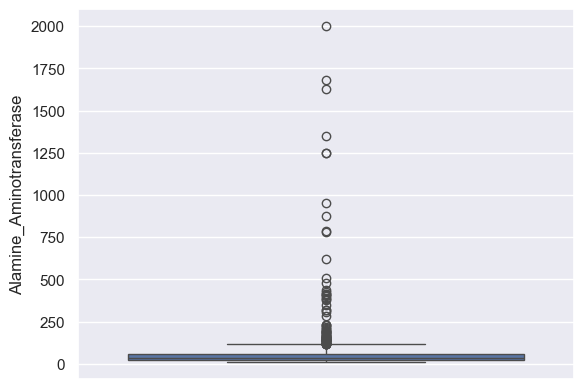

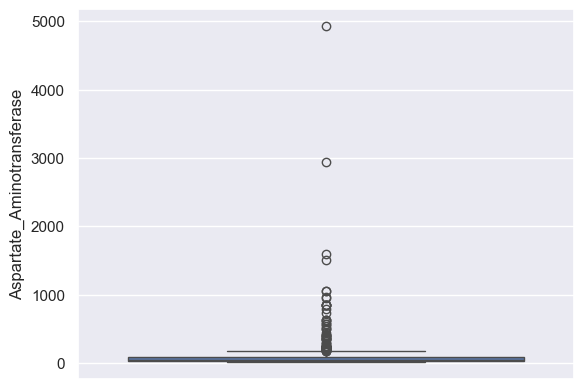

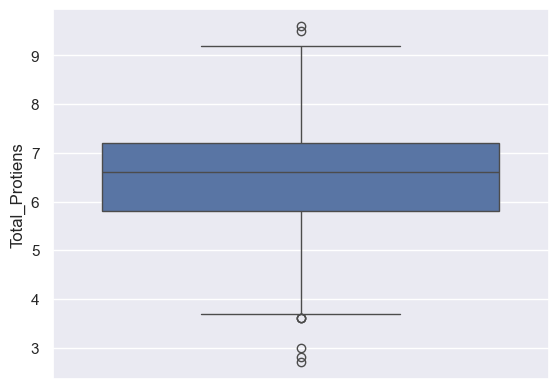

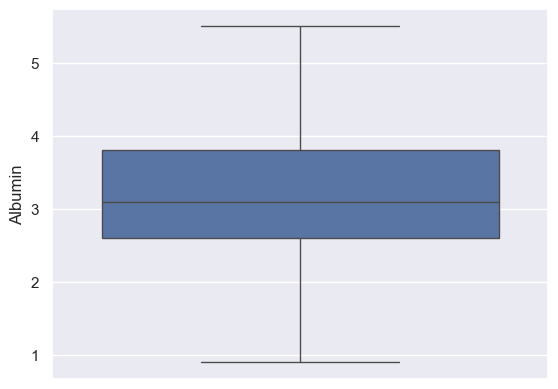

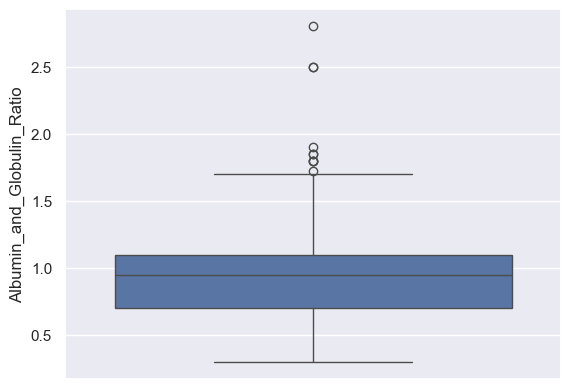

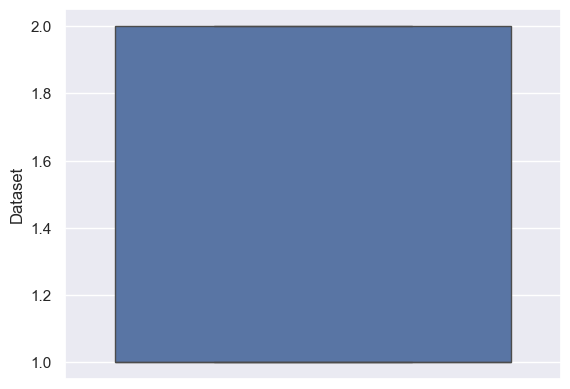

In [584]:
def boxplots(col):
    sns.boxplot(a[col])
    plt.show()
    
for i in list(a.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

# Alkaline_Phosphotase, Alamine_Aminotransferase, and Aspartate_Aminotransferase have heavy outliers.
# Other features like Total_Bilirubin and Direct_Bilirubin have moderate outliers.
# Protein-related features are relatively clean.


# IQR Method-Outlier Treatment

In [587]:
Total_Bilirubin_Q1 = a['Total_Bilirubin'].quantile(0.25)
Total_Bilirubin_Q3 = a['Total_Bilirubin'].quantile(0.75)
Total_Bilirubin_IQR = Total_Bilirubin_Q3 - Total_Bilirubin_Q1
Total_Bilirubin_upper = Total_Bilirubin_Q3 + 1.5 * Total_Bilirubin_IQR
Total_Bilirubin_lower = Total_Bilirubin_Q1 - 1.5 * Total_Bilirubin_IQR
print(f"Total_Bilirubin_upper_bound: {Total_Bilirubin_upper}, Total_Bilirubin_lower_bound: {Total_Bilirubin_lower}")

Total_Bilirubin_upper_bound: 5.300000000000001, Total_Bilirubin_lower_bound: -1.9000000000000001


In [588]:
a['Total_Bilirubin'] = a['Total_Bilirubin'].clip(lower=Total_Bilirubin_lower, upper=Total_Bilirubin_upper) #clip method

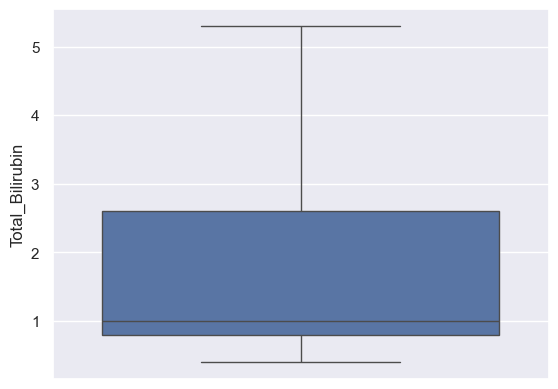

In [589]:
sns.boxplot(y = 'Total_Bilirubin', data=a)
plt.show()

In [590]:
Direct_Bilirubin_Q1 = a['Direct_Bilirubin'].quantile(0.25)
Direct_Bilirubin_Q3 = a['Direct_Bilirubin'].quantile(0.75)
Direct_Bilirubin_IQR = Direct_Bilirubin_Q3 - Direct_Bilirubin_Q1
Direct_Bilirubin_upper = Direct_Bilirubin_Q3 + 1.5 * Direct_Bilirubin_IQR
Direct_Bilirubin_lower = Direct_Bilirubin_Q1 - 1.5 * Direct_Bilirubin_IQR
print(f"Direct_Bilirubin_upper_bound: {Direct_Bilirubin_upper}, Direct_Bilirubin_lower_bound: {Direct_Bilirubin_lower}")

Direct_Bilirubin_upper_bound: 2.95, Direct_Bilirubin_lower_bound: -1.4500000000000002


In [591]:
a['Direct_Bilirubin'] = a['Direct_Bilirubin'].clip(lower=Direct_Bilirubin_lower, upper=Direct_Bilirubin_upper) #clip method

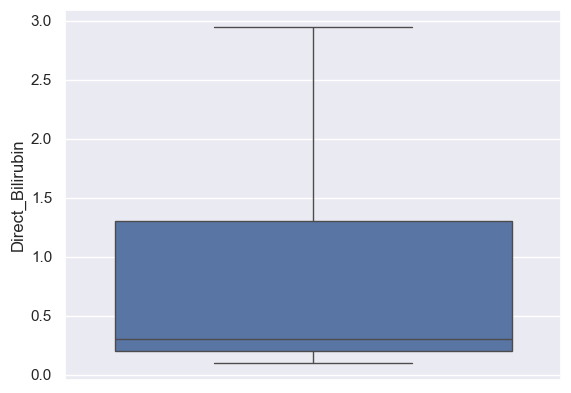

In [592]:
sns.boxplot(y = 'Direct_Bilirubin', data=a)
plt.show()

In [593]:
Alkaline_Phosphotase_Q1 = a['Alkaline_Phosphotase'].quantile(0.25)
Alkaline_Phosphotase_Q3 = a['Alkaline_Phosphotase'].quantile(0.75)
Alkaline_Phosphotase_IQR = Alkaline_Phosphotase_Q3 - Alkaline_Phosphotase_Q1
Alkaline_Phosphotase_upper = Alkaline_Phosphotase_Q3 + 1.5 * Alkaline_Phosphotase_IQR
Alkaline_Phosphotase_lower = Alkaline_Phosphotase_Q1 - 1.5 * Alkaline_Phosphotase_IQR
print(f"Alkaline_Phosphotase_upper_bound: {Alkaline_Phosphotase_upper}, Alkaline_Phosphotase_lower_bound: {Alkaline_Phosphotase_lower}")

Alkaline_Phosphotase_upper_bound: 481.0, Alkaline_Phosphotase_lower_bound: -7.0


In [594]:
a['Alkaline_Phosphotase'] = a['Alkaline_Phosphotase'].clip(lower=Alkaline_Phosphotase_lower, upper=Alkaline_Phosphotase_upper) #clip method

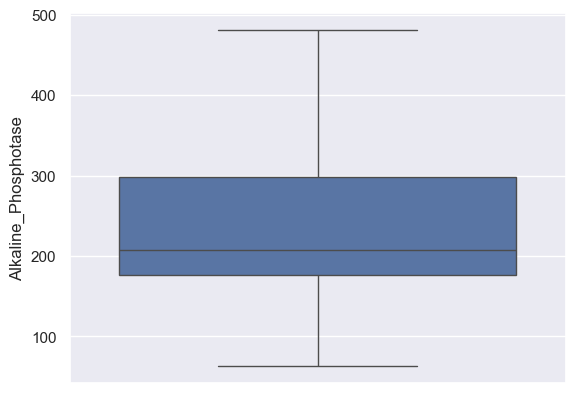

In [595]:
sns.boxplot(y = 'Alkaline_Phosphotase', data=a)
plt.show()

In [596]:
Alamine_Aminotransferase_Q1 = a['Alamine_Aminotransferase'].quantile(0.25)
Alamine_Aminotransferase_Q3 = a['Alamine_Aminotransferase'].quantile(0.75)
Alamine_Aminotransferase_IQR = Alamine_Aminotransferase_Q3 - Alamine_Aminotransferase_Q1
Alamine_Aminotransferase_upper = Alamine_Aminotransferase_Q3 + 1.5 * Alamine_Aminotransferase_IQR
Alamine_Aminotransferase_lower = Alamine_Aminotransferase_Q1 - 1.5 * Alamine_Aminotransferase_IQR
print(f"Alamine_Aminotransferase_upper_bound: {Alamine_Aminotransferase_upper}, Alamine_Aminotransferase_lower_bound: {Alamine_Aminotransferase_lower}")

Alamine_Aminotransferase_upper_bound: 115.5, Alamine_Aminotransferase_lower_bound: -32.5


In [597]:
a['Alamine_Aminotransferase'] = a['Alamine_Aminotransferase'].clip(lower=Alamine_Aminotransferase_lower, upper=Alamine_Aminotransferase_upper) 

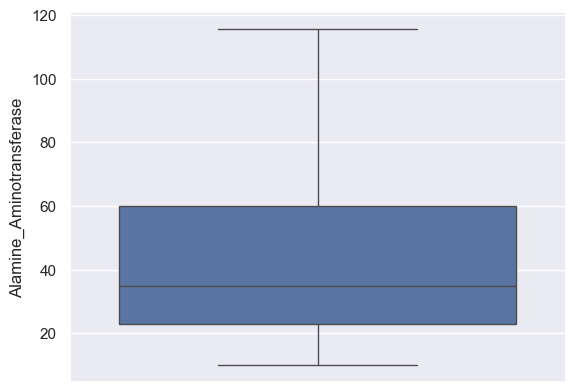

In [598]:
sns.boxplot(y = 'Alamine_Aminotransferase', data=a)
plt.show()

In [599]:
Aspartate_Aminotransferase_Q1 = a['Aspartate_Aminotransferase'].quantile(0.25)
Aspartate_Aminotransferase_Q3 = a['Aspartate_Aminotransferase'].quantile(0.75)
Aspartate_Aminotransferase_IQR = Aspartate_Aminotransferase_Q3 - Aspartate_Aminotransferase_Q1
Aspartate_Aminotransferase_upper = Aspartate_Aminotransferase_Q3 + 1.5 * Aspartate_Aminotransferase_IQR
Aspartate_Aminotransferase_lower = Aspartate_Aminotransferase_Q1 - 1.5 * Aspartate_Aminotransferase_IQR
print(f"Aspartate_Aminotransferase_upper_bound: {Aspartate_Aminotransferase_upper}, Aspartate_Aminotransferase_lower_bound: {Aspartate_Aminotransferase_lower}")

Aspartate_Aminotransferase_upper_bound: 179.375, Aspartate_Aminotransferase_lower_bound: -67.625


In [600]:
a['Aspartate_Aminotransferase'] = a['Aspartate_Aminotransferase'].clip(lower=Aspartate_Aminotransferase_lower, upper=Aspartate_Aminotransferase_upper) 

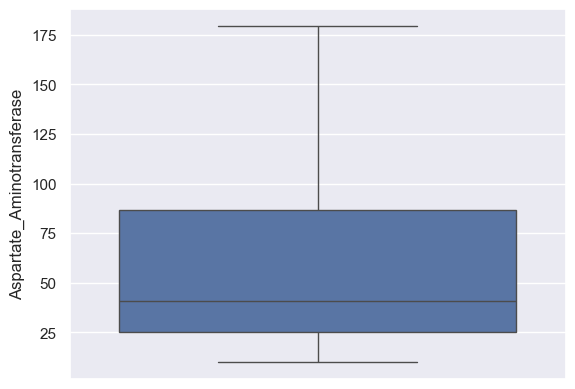

In [601]:
sns.boxplot(y = 'Aspartate_Aminotransferase', data=a)
plt.show()

In [602]:
Total_Protiens_Q1 = a['Total_Protiens'].quantile(0.25)
Total_Protiens_Q3 = a['Total_Protiens'].quantile(0.75)
Total_Protiens_IQR = Total_Protiens_Q3 - Total_Protiens_Q1
Total_Protiens_upper = Total_Protiens_Q3 + 1.5 * Total_Protiens_IQR
Total_Protiens_lower = Total_Protiens_Q1 - 1.5 * Total_Protiens_IQR
print(f"Total_Protiens_upper_bound: {Total_Protiens_upper}, Total_Protiens_lower_bound: {Total_Protiens_lower}")

Total_Protiens_upper_bound: 9.3, Total_Protiens_lower_bound: 3.6999999999999993


In [603]:
a['Total_Protiens'] = a['Total_Protiens'].clip(lower=Total_Protiens_lower, upper=Total_Protiens_upper) 

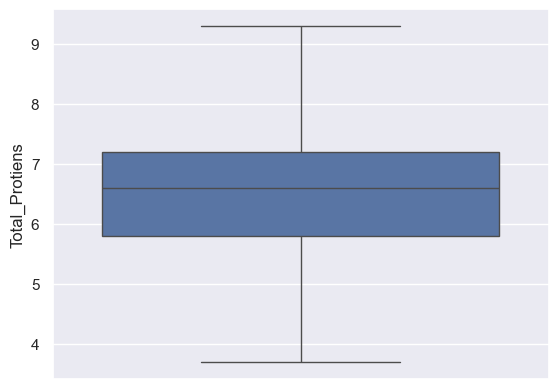

In [604]:
sns.boxplot(y = 'Total_Protiens', data=a)
plt.show()

In [605]:
Albumin_and_Globulin_Ratio_Q1 = a['Albumin_and_Globulin_Ratio'].quantile(0.25)
Albumin_and_Globulin_Ratio_Q3 = a['Albumin_and_Globulin_Ratio'].quantile(0.75)
Albumin_and_Globulin_Ratio_IQR = Albumin_and_Globulin_Ratio_Q3 - Albumin_and_Globulin_Ratio_Q1
Albumin_and_Globulin_Ratio_upper = Albumin_and_Globulin_Ratio_Q3 + 1.5 * Albumin_and_Globulin_Ratio_IQR
Albumin_and_Globulin_Ratio_lower = Albumin_and_Globulin_Ratio_Q1 - 1.5 * Albumin_and_Globulin_Ratio_IQR
print(f"Albumin_and_Globulin_Ratio_upper_bound: {Albumin_and_Globulin_Ratio_upper}, Albumin_and_Globulin_Ratio_lower_bound: {Albumin_and_Globulin_Ratio_lower}")

Albumin_and_Globulin_Ratio_upper_bound: 1.7000000000000002, Albumin_and_Globulin_Ratio_lower_bound: 0.09999999999999976


In [606]:
a['Albumin_and_Globulin_Ratio'] = a['Albumin_and_Globulin_Ratio'].clip(lower=Albumin_and_Globulin_Ratio_lower, upper=Albumin_and_Globulin_Ratio_upper) 

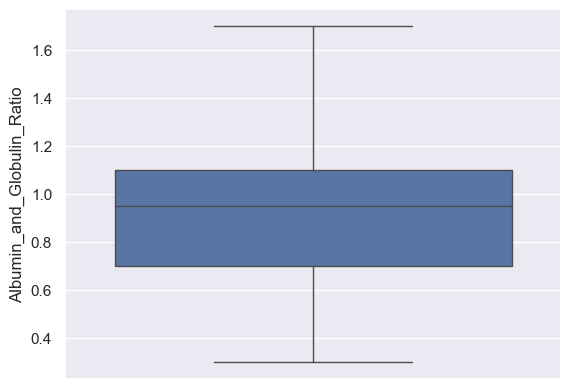

In [607]:
sns.boxplot(y = 'Albumin_and_Globulin_Ratio', data=a)
plt.show()

# Encoding

In [609]:
a['Gender'] = a['Gender'].astype('category')
a['Gender'] = a['Gender'].cat.codes # Label Encoding

In [610]:
a

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.10,187,16.0,18.0,6.8,3.3,0.90,1
1,62,1,5.3,2.95,481,64.0,100.0,7.5,3.2,0.74,1
2,62,1,5.3,2.95,481,60.0,68.0,7.0,3.3,0.89,1
3,58,1,1.0,0.40,182,14.0,20.0,6.8,3.4,1.00,1
4,72,1,3.9,2.00,195,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.10,481,20.0,34.0,5.9,1.6,0.37,2
579,40,1,0.6,0.10,98,35.0,31.0,6.0,3.2,1.10,1
580,52,1,0.8,0.20,245,48.0,49.0,6.4,3.2,1.00,1
581,31,1,1.3,0.50,184,29.0,32.0,6.8,3.4,1.00,1


In [611]:
a.Gender.dtypes

dtype('int8')

In [612]:
# Correlation

In [613]:
a.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.058237,0.102560,0.097417,0.042209,-0.064728,-0.027117,-0.196122,-0.271170,-0.224151,-0.138093
Gender,0.058237,1.000000,0.178653,0.177778,0.053061,0.160408,0.164699,-0.085434,-0.091369,-0.013817,-0.078501
Total_Bilirubin,0.102560,0.178653,1.000000,0.982667,0.362967,0.446776,0.540691,-0.070245,-0.305188,-0.329309,-0.320651
Direct_Bilirubin,0.097417,0.177778,0.982667,1.000000,0.370545,0.441627,0.539799,-0.053809,-0.294308,-0.331061,-0.322384
Alkaline_Phosphotase,0.042209,0.053061,0.362967,0.370545,1.000000,0.380166,0.301916,0.008289,-0.173784,-0.301739,-0.241504
Alamine_Aminotransferase,-0.064728,0.160408,0.446776,0.441627,0.380166,1.000000,0.782414,0.014734,-0.034510,-0.085609,-0.287636
Aspartate_Aminotransferase,-0.027117,0.164699,0.540691,0.539799,0.301916,0.782414,1.000000,-0.033671,-0.160079,-0.169384,-0.297101
Total_Protiens,-0.196122,-0.085434,-0.070245,-0.053809,0.008289,0.014734,-0.033671,1.000000,0.784993,0.249023,0.035910
Albumin,-0.271170,-0.091369,-0.305188,-0.294308,-0.173784,-0.034510,-0.160079,0.784993,1.000000,0.733260,0.166835
Albumin_and_Globulin_Ratio,-0.224151,-0.013817,-0.329309,-0.331061,-0.301739,-0.085609,-0.169384,0.249023,0.733260,1.000000,0.189028


# Key Insights from Correlation:

* Total_Bilirubin and Direct_Bilirubin are highly correlated (0.98) → They give almost the same information.

* Alamine_Aminotransferase and Aspartate_Aminotransferase are strongly correlated (0.78) → Similar behavior.

* Albumin and Total_Protiens show a good correlation (0.78) → Related measures.

* Albumin and Albumin_and_Globulin_Ratio are also strongly related (0.73).

* No single feature is perfectly correlated with the target (Dataset), but some have mild negative correlation (like Total_Bilirubin and Direct_Bilirubin).

# Dropping Columns (Due to High Correlation):
* Direct_Bilirubin has a 0.98 correlation with Total_Bilirubin → ✅ Drop one (preferably Direct_Bilirubin).

* Aspartate_Aminotransferase has a 0.78 correlation with Alamine_Aminotransferase → ✅ Drop one (preferably Aspartate_Aminotransferase).

* Albumin_and_Globulin_Ratio has a 0.73 correlation with Albumin → ✅ Drop one (preferably Albumin_and_Globulin_Ratio).

# Why check EDA first?
Sometimes highly correlated features may still hold unique patterns.
Dropping without checking may affect model accuracy.
Outliers and imbalanced data may mislead correlation results.

# Univariate Analysis

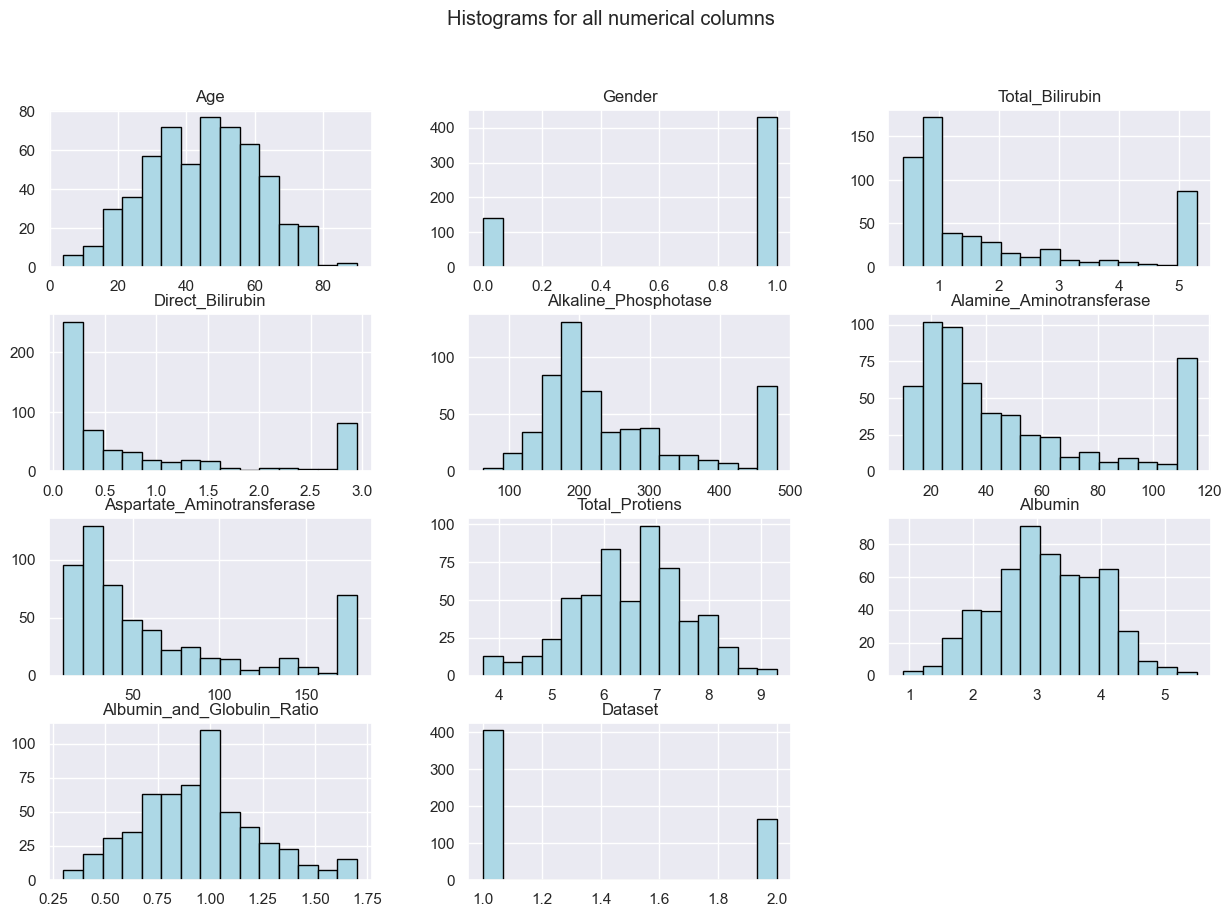

In [618]:
a.hist(bins=15, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle('Histograms for all numerical columns')
plt.show()

# Univariate Analysis Insights from Histograms:
* Age
Almost normal distribution, slightly right-skewed.
Most patients are between 30–60 years.

* Gender
Binary distribution (0 and 1).
Dataset seems slightly male-dominant.

* Total Bilirubin & Direct Bilirubin
Right-skewed with outliers.
Few patients have very high bilirubin levels, which might impact liver health.

* Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase
Strong right-skewed with several high extreme values.
Indicates possible outliers and abnormal enzyme levels in some patients.

* Total Proteins & Albumin
Close to normal distribution, slightly left-skewed.
Balanced values overall.

* Albumin and Globulin Ratio
Normal distribution centered around 1.0, slight spread on both sides.
Dataset (Target variable)

* Imbalanced classes.
Majority of patients labeled as 1 (non-disease or one class), with fewer as 2 (disease or another class).

# Key Insights from Univariate Analysis:
* Skewed Distributions:
Most biochemical markers like Bilirubin, Enzymes (Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase) show right-skewed distributions with noticeable outliers, indicating abnormal levels in certain patients.

* Normal-like Distributions:
Features like Age, Total Proteins, Albumin, and Albumin_and_Globulin_Ratio show relatively balanced distributions, making them stable predictors.

* Target Imbalance:
The Dataset (target variable) is imbalanced, with more patients in one class than the other. This may impact model performance and requires balancing techniques.

* Potential Need for Scaling:
Due to varied ranges and skewed data, feature scaling (like MinMaxScaler or StandardScaler) is essential, especially for distance-based models like KNN.

* High Correlation Support:
Skewed and highly correlated pairs like Total Bilirubin & Direct Bilirubin reinforce the idea of dropping one redundant feature to reduce multicollinearity.

# Bivariate Analysis:

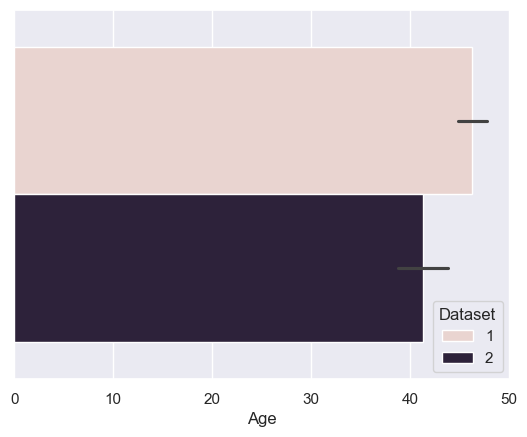

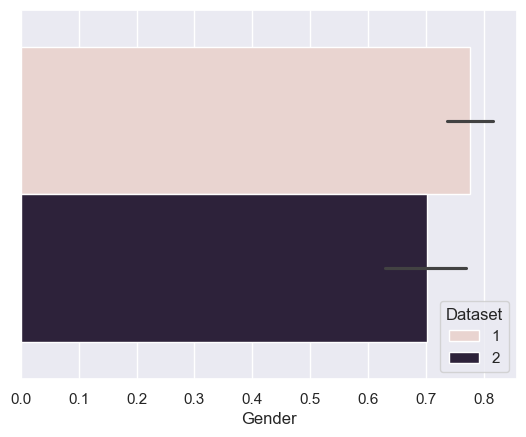

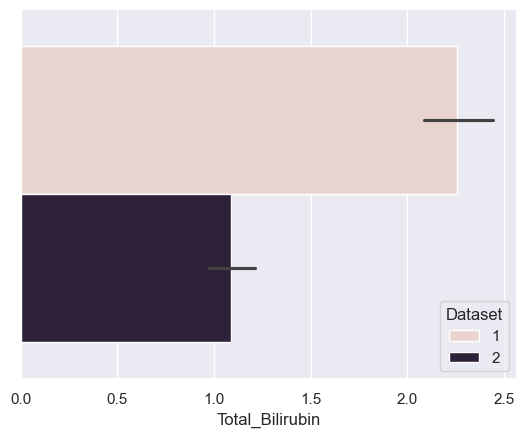

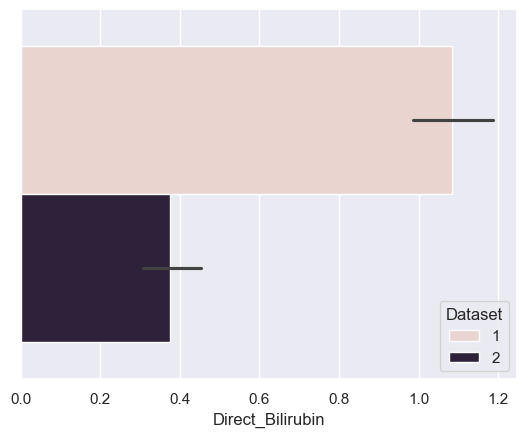

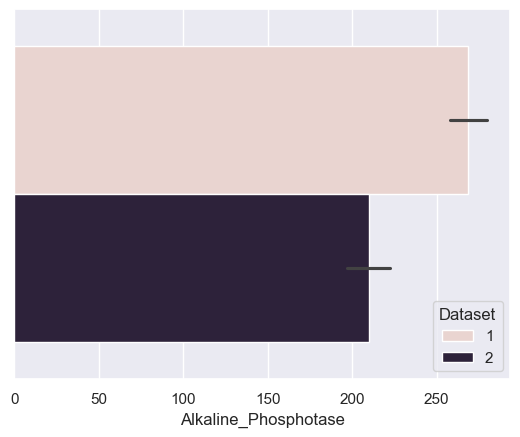

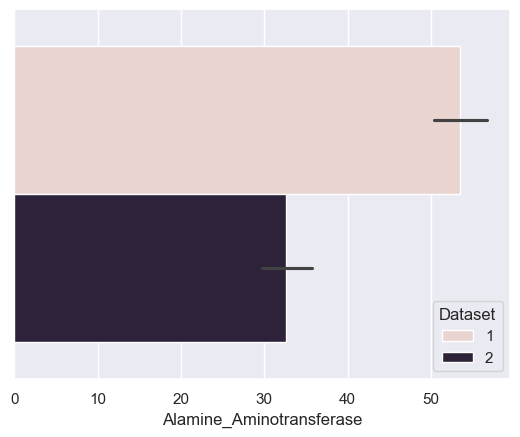

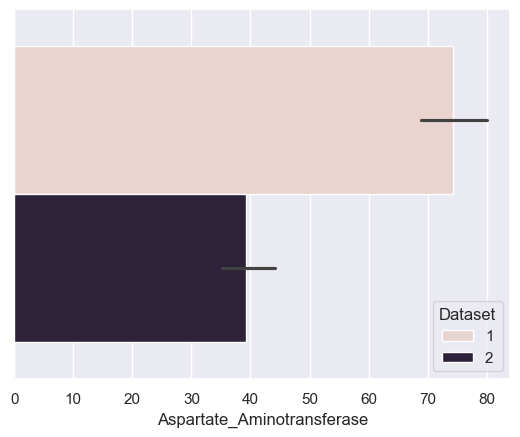

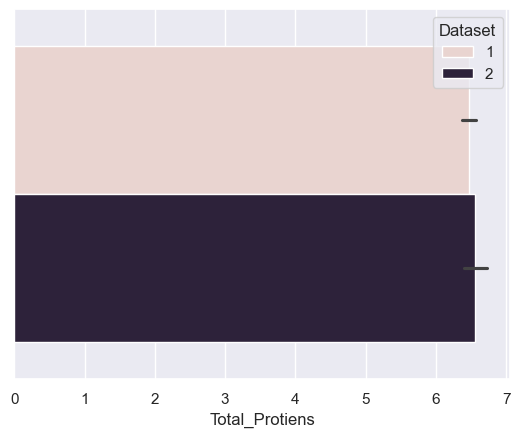

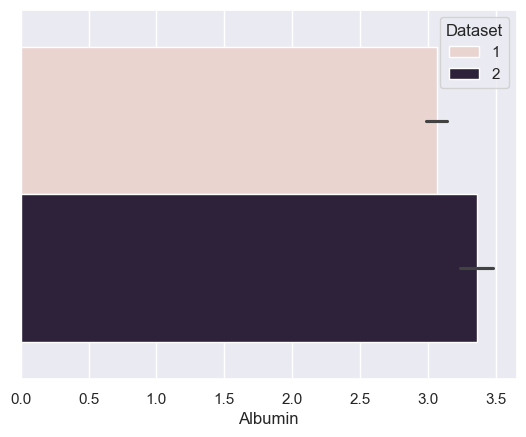

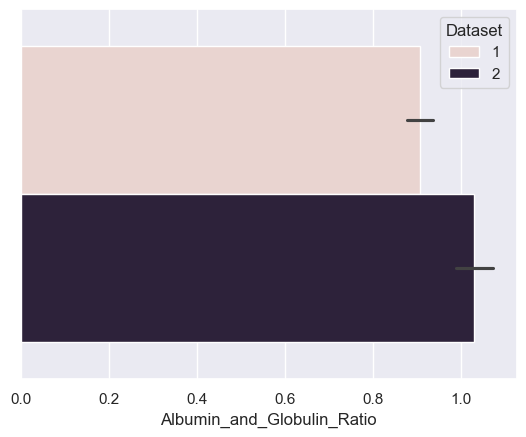

In [622]:
for i, predictor in enumerate(a.drop(columns=['Dataset'])):
    plt.figure()
    sns.barplot(data=a,x=predictor,hue='Dataset')

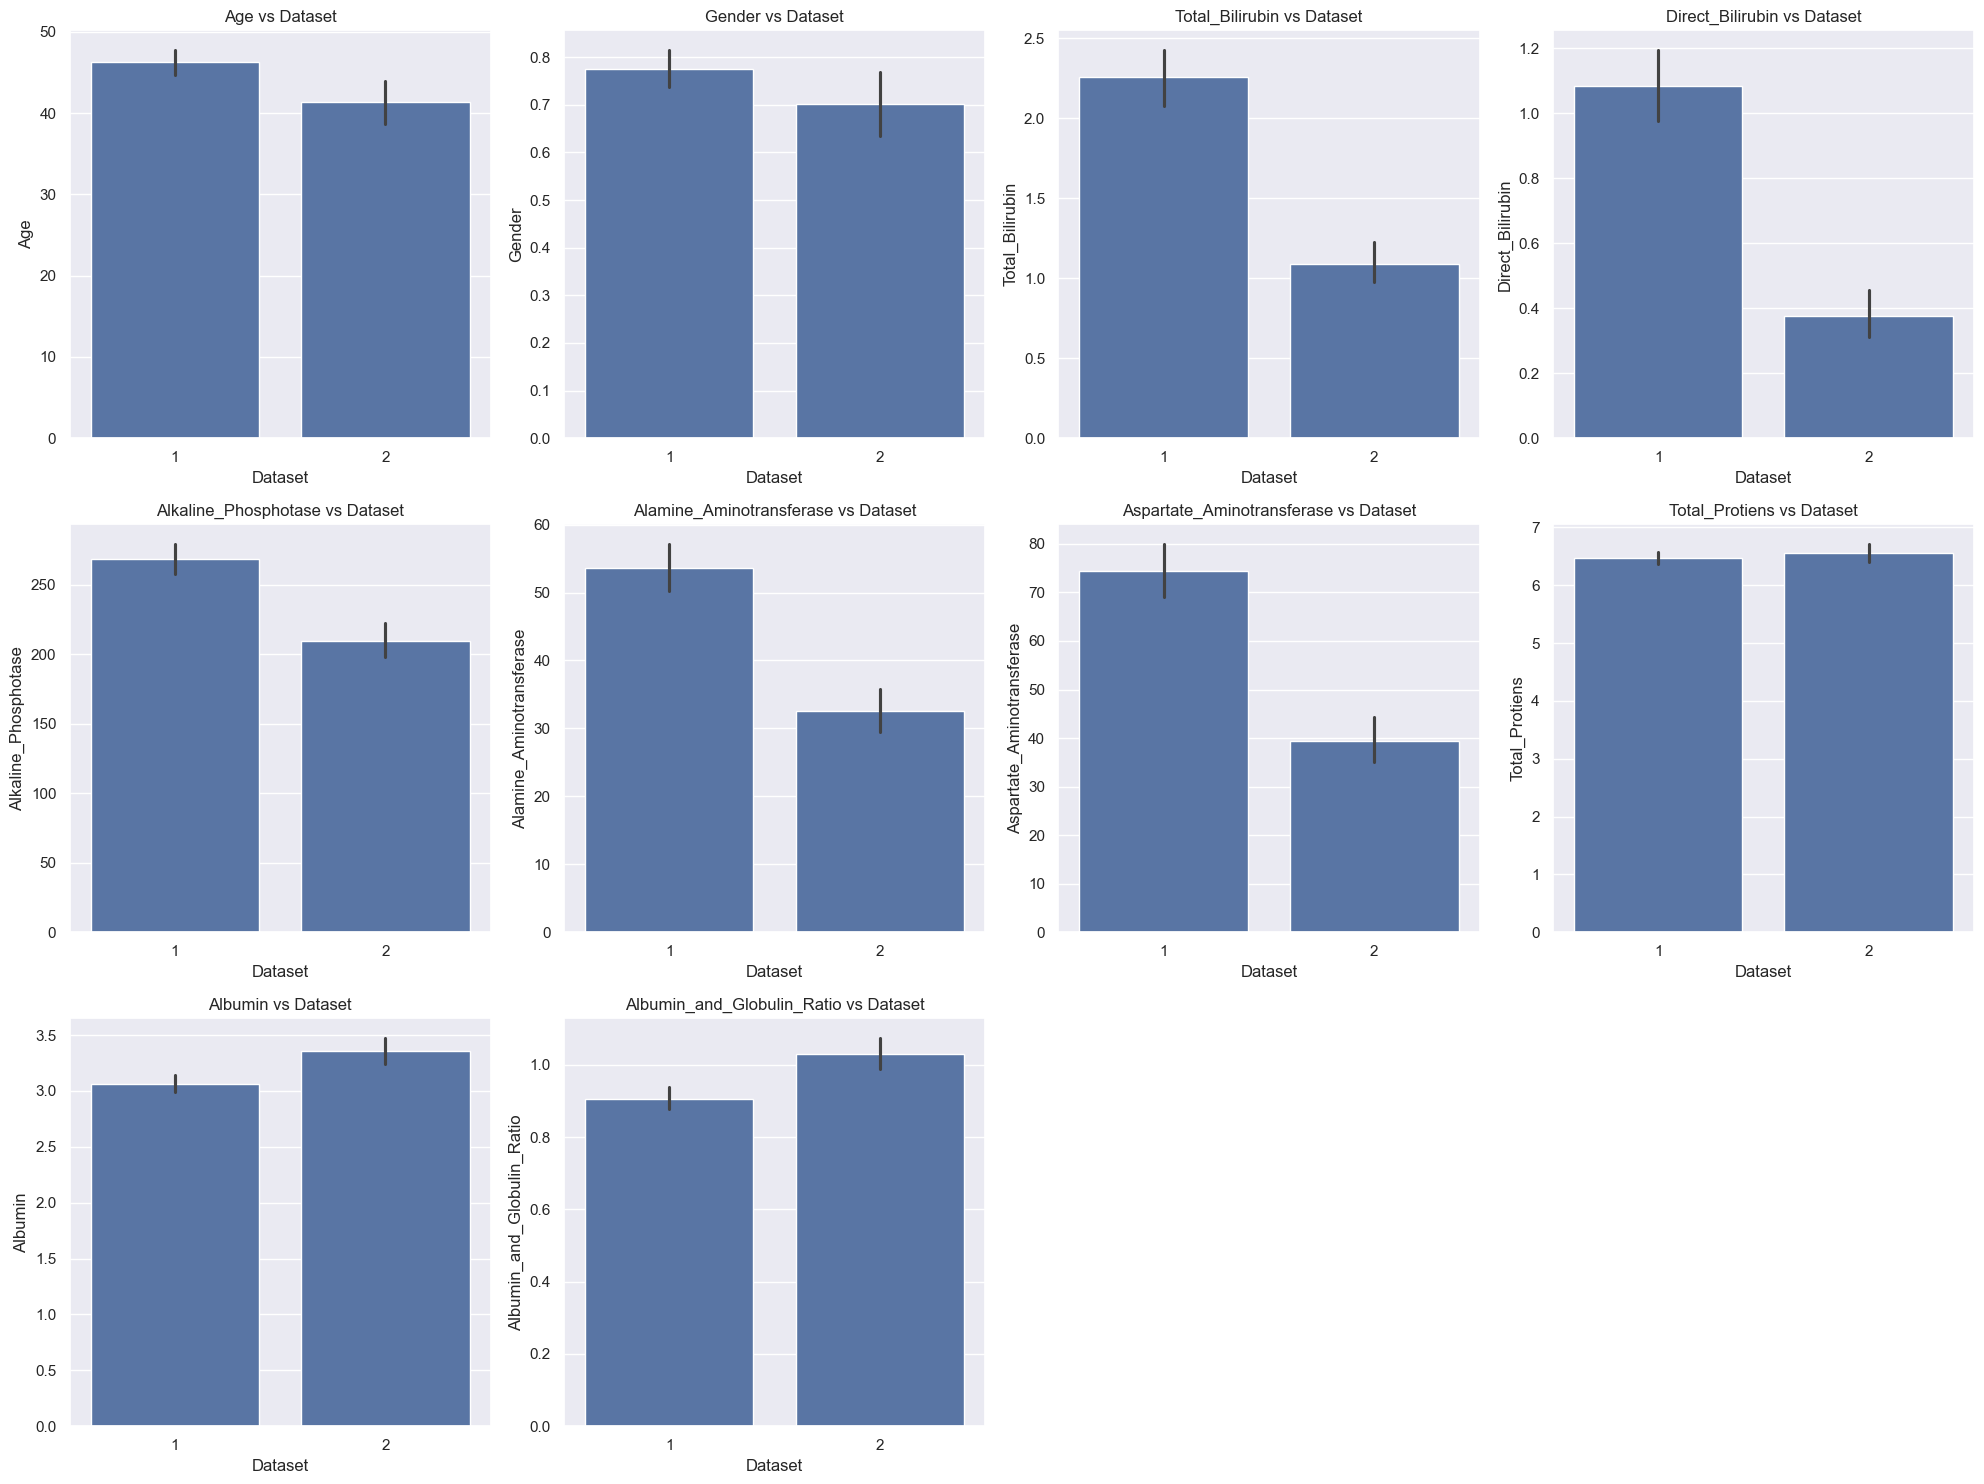

In [623]:
# List of predictors (excluding target 'Dataset')
predictors = a.drop(columns=['Dataset']).columns

# Set up the grid size based on the number of predictors
rows = 3
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, predictor in enumerate(predictors):
    sns.barplot(data=a, x='Dataset', y=predictor, ax=axes[i])
    axes[i].set_title(f"{predictor} vs Dataset")
    axes[i].set_xlabel("Dataset")
    axes[i].set_ylabel(predictor)

# Remove any empty subplots (if total plots < rows*cols)
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Bivariate Analysis Insights
* Age:
Patients labeled as 1 (Disease) have a slightly higher average age compared to 2 (No Disease).
* Gender:
Majority in both categories are male-dominated (closer to 0.8), with minimal difference between diseased and non-diseased.
* Total_Bilirubin & Direct_Bilirubin:
Significantly higher in diseased patients (1), suggesting these are strong indicators of liver issues.
* Alkaline_Phosphatase, Alanine_Aminotransferase, Aspartate_Aminotransferase:
Elevated levels in diseased group (1), supporting their relevance as diagnostic biomarkers.
* Total_Proteins:
Similar across both groups, showing less impact on distinguishing disease presence.
* Albumin:
Surprisingly, slightly higher in non-diseased (2) patients, indicating inverse relation with disease.
* Albumin_and_Globulin_Ratio:
Marginally higher in non-diseased (2) group, but difference is small.


# Strong Indicators for Disease (higher in diseased):

* Total_Bilirubin
* Direct_Bilirubin
* Alkaline_Phosphatase
* Alanine_Aminotransferase
* Aspartate_Aminotransferase
* Age

# Inverse or less impactful indicators:

* Albumin (higher in non-diseased)
* Albumin_and_Globulin_Ratio (slightly higher in non-diseased)
* Total_Proteins (no major difference)
* Gender (little to no effect)

# HEATMAP

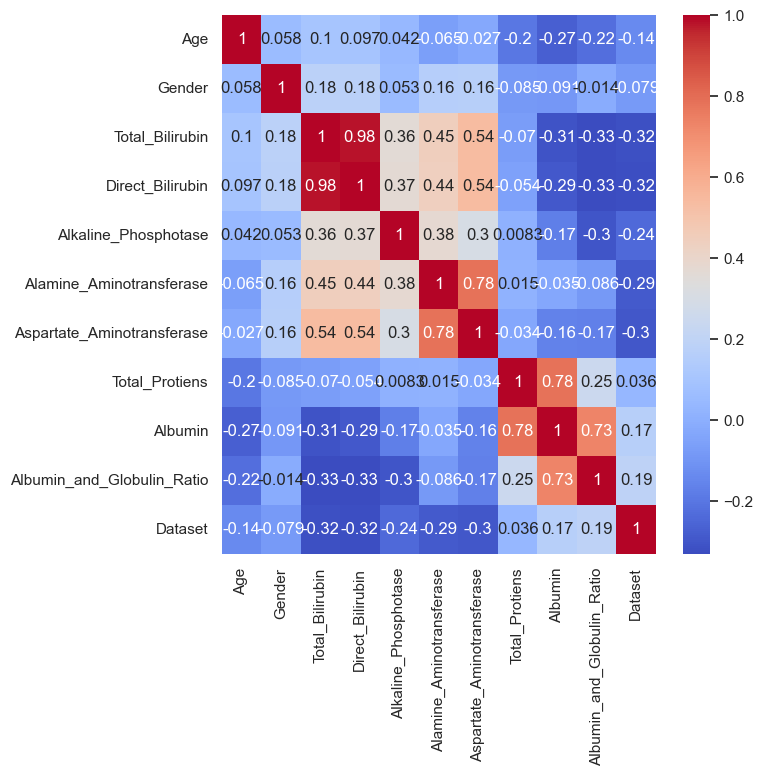

In [627]:
plt.figure(figsize=(7,7))
sns.heatmap(a.corr(), annot=True, cmap='coolwarm')
plt.show()

# Very high correlation (multicollinearity) between:

* Total_Bilirubin (0.98) ↔ Direct_Bilirubin
* Alanine_Aminotransferase (0.78) ↔ Aspartate_Aminotransferase
* Albumin (0.78) ↔ Total_Proteins (0.78)
* Albumin (0.73) ↔ Albumin_and_Globulin_Ratio

In [629]:
b=a.copy()

In [630]:
b = b.drop(columns=['Direct_Bilirubin', 'Aspartate_Aminotransferase', 
                   'Albumin_and_Globulin_Ratio', 'Total_Protiens'])

In [631]:
b.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin', 'Dataset'],
      dtype='object')

# Feature Selection

In [633]:
# we can only do with independent variable
# split the data into independent variable and dependent variable
x = b.iloc[:,0:-1]
y = b['Dataset']

In [634]:
x.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin
0,65,0,0.7,187,16.0,3.3
1,62,1,5.3,481,64.0,3.2


In [635]:
y.head(2)

0    1
1    1
Name: Dataset, dtype: int64

# Feature Scaling - Standardization

In [637]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5
0,1.241741,-1.752549,-0.738193,-0.586969,-0.956993,0.189737
1,1.056874,0.570597,2.046760,2.090774,0.499659,0.064127
2,1.056874,0.570597,2.046760,2.090774,0.378272,0.189737
3,0.810385,0.570597,-0.556566,-0.632508,-1.017687,0.315348
4,1.673096,0.570597,1.199165,-0.514105,-0.623177,-0.940754
...,...,...,...,...,...,...
565,0.933630,0.570597,-0.859278,2.090774,-0.835605,-1.945636
566,-0.298813,0.570597,-0.798735,-1.397578,-0.380401,0.064127
567,0.440653,0.570597,-0.677651,-0.058706,0.014109,0.064127
568,-0.853413,0.570597,-0.374938,-0.614292,-0.562483,0.315348


# IMBALANCE CHECKING

In [643]:
# Check Imbalance Data
b['Dataset'].value_counts()

Dataset
1    406
2    164
Name: count, dtype: int64

In [644]:
total = b['Dataset'].count()
percent_1 = (406 / total) * 100
percent_2 = (164 / total) * 100
print(f"Class 1: {percent_1:.2f}%")
print(f"Class 2: {percent_2:.2f}%")

Class 1: 71.23%
Class 2: 28.77%


In [645]:
import imblearn

In [646]:
from imblearn.over_sampling import RandomOverSampler # SMOTE
ros = RandomOverSampler() # SMOTE()
x_sam, y_sam = ros.fit_resample(sc_x, y)
print(x_sam.shape, y_sam.shape, y.shape)

(812, 6) (812,) (570,)


In [647]:
y_sam.value_counts()

Dataset
1    406
2    406
Name: count, dtype: int64

# Model Selection & Training
* Split data (Train-Test Split, 80-20 or 70-30)
* Choose the model based on the problem
* Train the model on the training dataset

# split the data into training and test

In [650]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.25, random_state=101,
                                                  stratify=y_sam )

# Building KNN model

In [652]:
from sklearn.neighbors import KNeighborsClassifier

# Choose the best K-Value (HyperParameter Tunning)

In [654]:
error_rate  = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [655]:
error_rate

[0.15270935960591134,
 0.22660098522167488,
 0.1921182266009852,
 0.2019704433497537,
 0.22660098522167488,
 0.3054187192118227,
 0.28078817733990147,
 0.2955665024630542,
 0.29064039408866993,
 0.33004926108374383,
 0.28078817733990147,
 0.32019704433497537,
 0.28078817733990147,
 0.3054187192118227,
 0.2857142857142857,
 0.3054187192118227,
 0.29064039408866993,
 0.29064039408866993,
 0.3054187192118227,
 0.29064039408866993,
 0.28078817733990147,
 0.27586206896551724,
 0.2955665024630542,
 0.3103448275862069,
 0.2857142857142857,
 0.2955665024630542,
 0.29064039408866993,
 0.2857142857142857,
 0.2857142857142857,
 0.27586206896551724,
 0.28078817733990147,
 0.2955665024630542,
 0.30049261083743845,
 0.2955665024630542,
 0.2955665024630542,
 0.29064039408866993,
 0.2857142857142857,
 0.27586206896551724,
 0.29064039408866993]

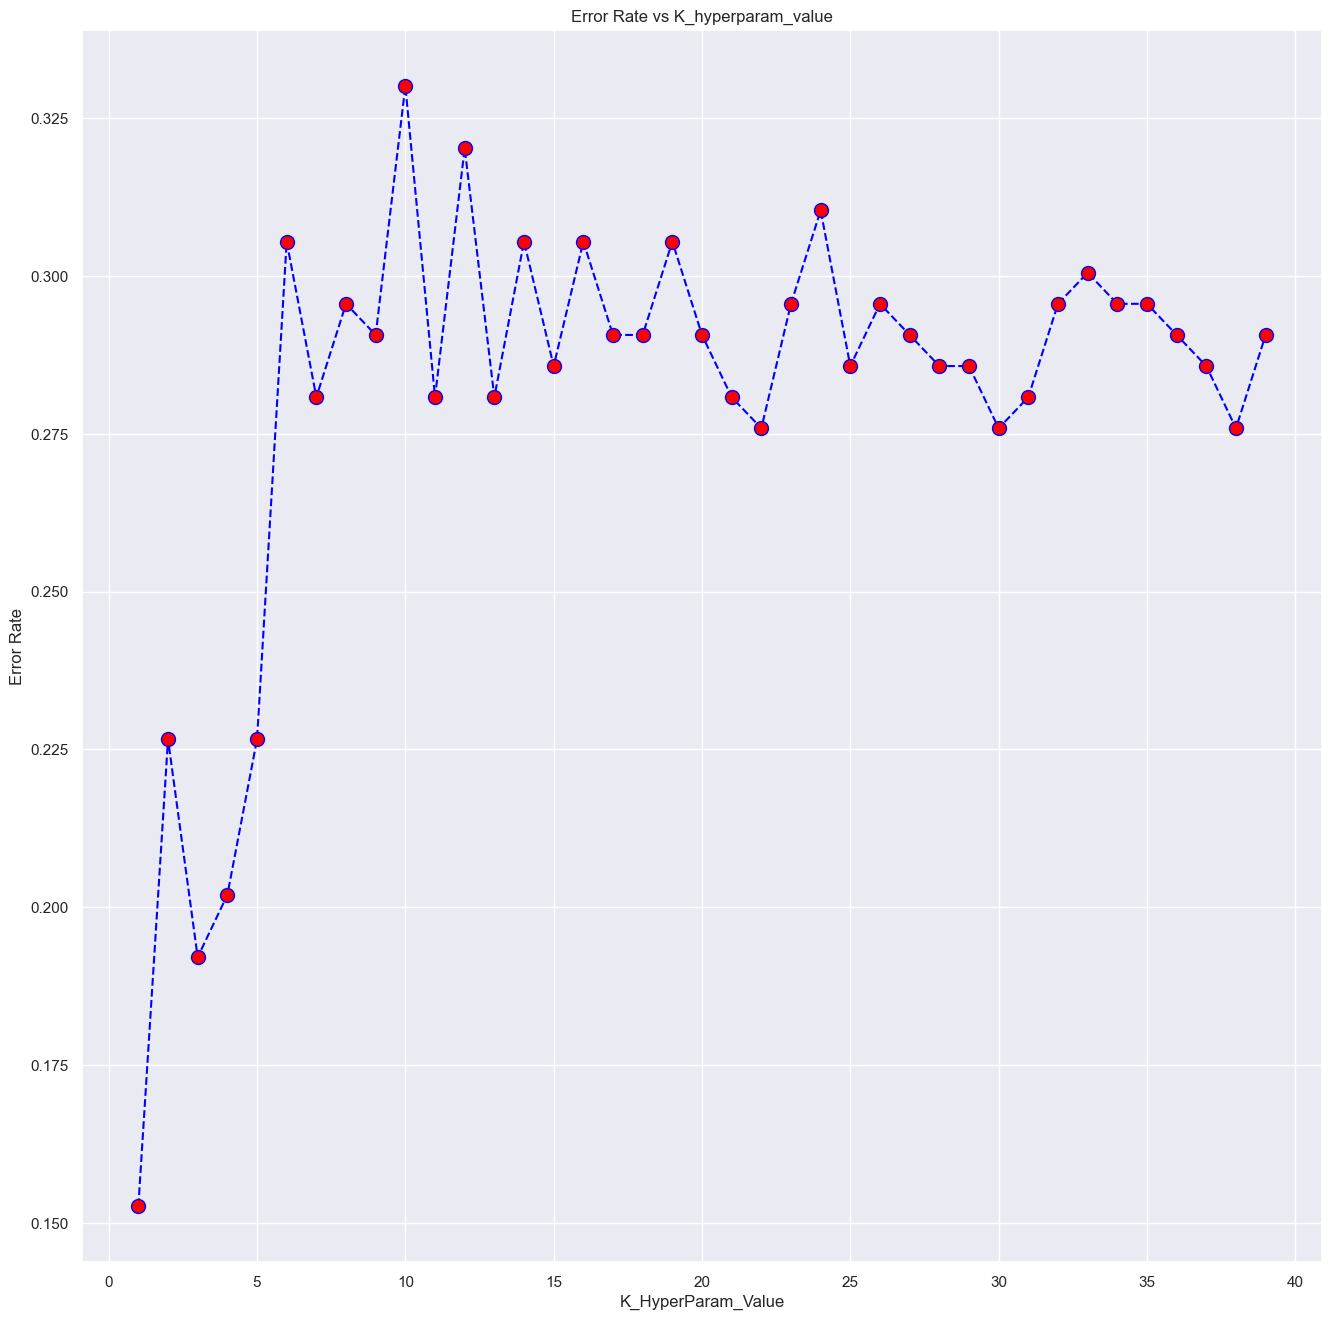

In [656]:
plt.figure(figsize=(16,16))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K_hyperparam_value")
plt.xlabel("K_HyperParam_Value")
plt.ylabel("Error Rate")
plt.show()

In [657]:
# Basis analysis, error_rate would be less when we choose k=27

knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [658]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [659]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [660]:
print(confusion_matrix(y_train, y_pred_train))
print("****************"*5)
print(confusion_matrix(y_test, y_pred_test))

[[175 130]
 [ 45 259]]
********************************************************************************
[[60 41]
 [17 85]]


In [661]:
print(classification_report(y_train, y_pred_train))
print("****************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.80      0.57      0.67       305
           2       0.67      0.85      0.75       304

    accuracy                           0.71       609
   macro avg       0.73      0.71      0.71       609
weighted avg       0.73      0.71      0.71       609

********************************************************************************
              precision    recall  f1-score   support

           1       0.78      0.59      0.67       101
           2       0.67      0.83      0.75       102

    accuracy                           0.71       203
   macro avg       0.73      0.71      0.71       203
weighted avg       0.73      0.71      0.71       203



In [662]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.7126436781609196
********************************************************************************
Test Accuracy : 0.7142857142857143


# Cross Validation¶

In [664]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(knn, x_train, y_train, cv=10)
test_accuracy = cross_val_score(knn, x_test, y_test, cv=10)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.6765027322404372
*******************************************************************************************************************
Test Accuracy after CV : 0.7209523809523809
